<a href="https://colab.research.google.com/github/HoangThangCDT/Homework/blob/main/classification_10_fruit_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
im_shape = (150,150)

TRAINING_DIR = '../content/drive/MyDrive/fruit/train_data'
TEST_DIR = '../content/drive/MyDrive/fruit/test_data'

seed = 10

BATCH_SIZE = 16

In [3]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [4]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
# Generator data train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator data validation
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator data test
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 1146 images belonging to 10 classes.
Found 280 images belonging to 10 classes.
Found 191 images belonging to 10 classes.
Classes: ['bơ', 'cam', 'chom chom', 'dau tay', 'kiwi', 'mang cut', 'sau rieng', 'tao', 'thang long', 'xoai']


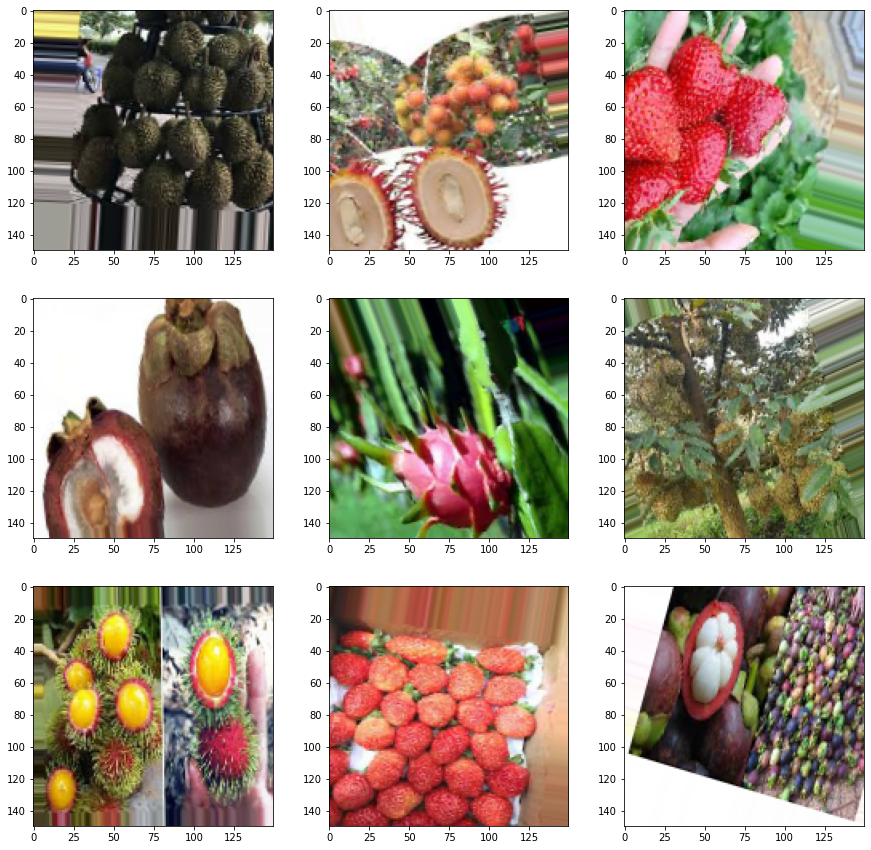

In [32]:
plt.figure(figsize=(15,15))
for i in range(9):
    
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compile model

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 331776)            0         
                                                                 
 dense (Dense)               (None, 128)               42467456  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [7]:
#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=100,
        
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/100
71/71 [==============================] - 385s 5s/step - loss: 3.4638 - accuracy: 0.2000 - val_loss: 1.7653 - val_accuracy: 0.2243
Epoch 2/100
71/71 [==============================] - 10s 135ms/step - loss: 1.8881 - accuracy: 0.2602 - val_loss: 1.7493 - val_accuracy: 0.3051
Epoch 3/100
71/71 [==============================] - 10s 135ms/step - loss: 1.7999 - accuracy: 0.3027 - val_loss: 1.5162 - val_accuracy: 0.5000
Epoch 4/100
71/71 [==============================] - 10s 135ms/step - loss: 1.6817 - accuracy: 0.4080 - val_loss: 1.2564 - val_accuracy: 0.5404
Epoch 5/100
71/71 [==============================] - 10s 135ms/step - loss: 1.6361 - accuracy: 0.4204 - val_loss: 1.1544 - val_accuracy: 0.5772
Epoch 6/100
71/71 [==============================] - 10s 134ms/step - loss: 1.5654 - accuracy: 0.4292 - val_loss: 1.2284 - val_accuracy: 0.5221
Epoch 7/100
71/71 [==============================] - 10s 136ms/step - loss: 1.5010 - accuracy: 0.4743 - val_loss: 1.3670 - val_accuracy: 0

In [15]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import load_img,img_to_array

In [16]:
model.save('/content/drive/MyDrive/final.h')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/final.h/assets


In [19]:
model5 = tf.keras.models.load_model('/content/drive/MyDrive/final.h')

'bơ'

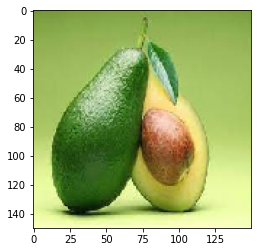

In [20]:
img=load_img('/content/drive/MyDrive/fruit/pred/bơ.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]

'cam'

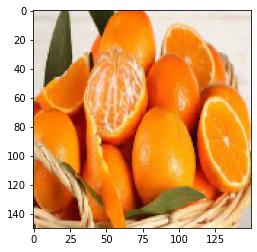

In [21]:
img=load_img('/content/drive/MyDrive/fruit/pred/cam.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]

'chom chom'

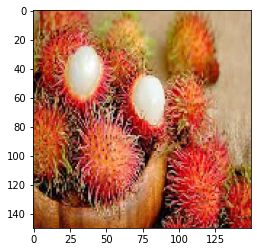

In [22]:
img=load_img('/content/drive/MyDrive/fruit/pred/chom chom.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]

'dau tay'

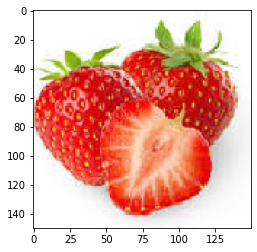

In [25]:
img=load_img('/content/drive/MyDrive/fruit/pred/dau.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]

'kiwi'

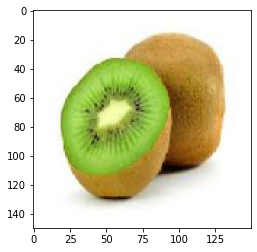

In [27]:
img=load_img('/content/drive/MyDrive/fruit/pred/kiwi.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]

'mang cut'

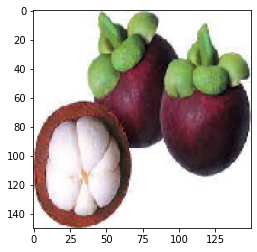

In [28]:
img=load_img('/content/drive/MyDrive/fruit/pred/mang cut.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]

'tao'

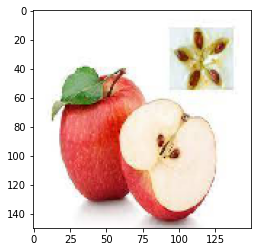

In [29]:
img=load_img('/content/drive/MyDrive/fruit/pred/tao.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]

'thang long'

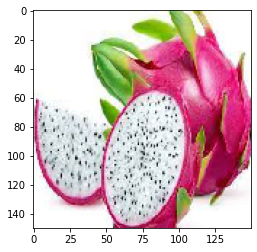

In [30]:
img=load_img('/content/drive/MyDrive/fruit/pred/thang long.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]

'xoai'

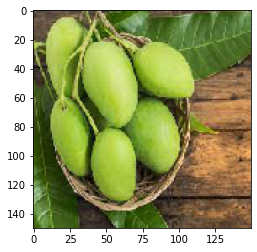

In [31]:
img=load_img('/content/drive/MyDrive/fruit/pred/xoai.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]